## California Housing dataset <br>
**Data Set Characteristics:** <br> 
:Number of Instances: 20640 <br>
:Number of Attributes: 8 numeric, predictive attributes and the target <br>
:Attribute Information: <br>    
- MedInc        median income in block group <br>
- HouseAge      median house age in block group <br>    
- AveRooms      average number of rooms per household   <br>
- AveBedrms     average number of bedrooms per household    <br>
- Population    block group population    <br>
- AveOccup      average number of household members    <br>
- Latitude      block group latitude    <br>
- Longitude     block group longitude <br> <br>
:Missing Attribute Values: None <br> 
This dataset was obtained from the StatLib repository. <br>
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html <br>
The **target** variable is the median house value for California districts,<br> expressed in **hundreds of thousands of dollars ($100,000).**  <br> <br>
This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). <br> <br> A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts. <br> <br> It can be downloaded /loaded using the <br>
:func: `sklearn.datasets.fetch_california_housing` function.<br> 
..rubric:: References<br><br>
- Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,  Statistics and Probability Letters, 33 (1997) 291-297'

## Import libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load Data from sklearn and make a DataFrame

In [83]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

ca_house_df = pd.DataFrame(data.data, columns=data.feature_names)
ca_house_df['Target'] = data.target
ca_house_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


### Short exploration of the data via .info() and .describe()

In [84]:
ca_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [85]:
ca_house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Visulize Data via Pairplot()

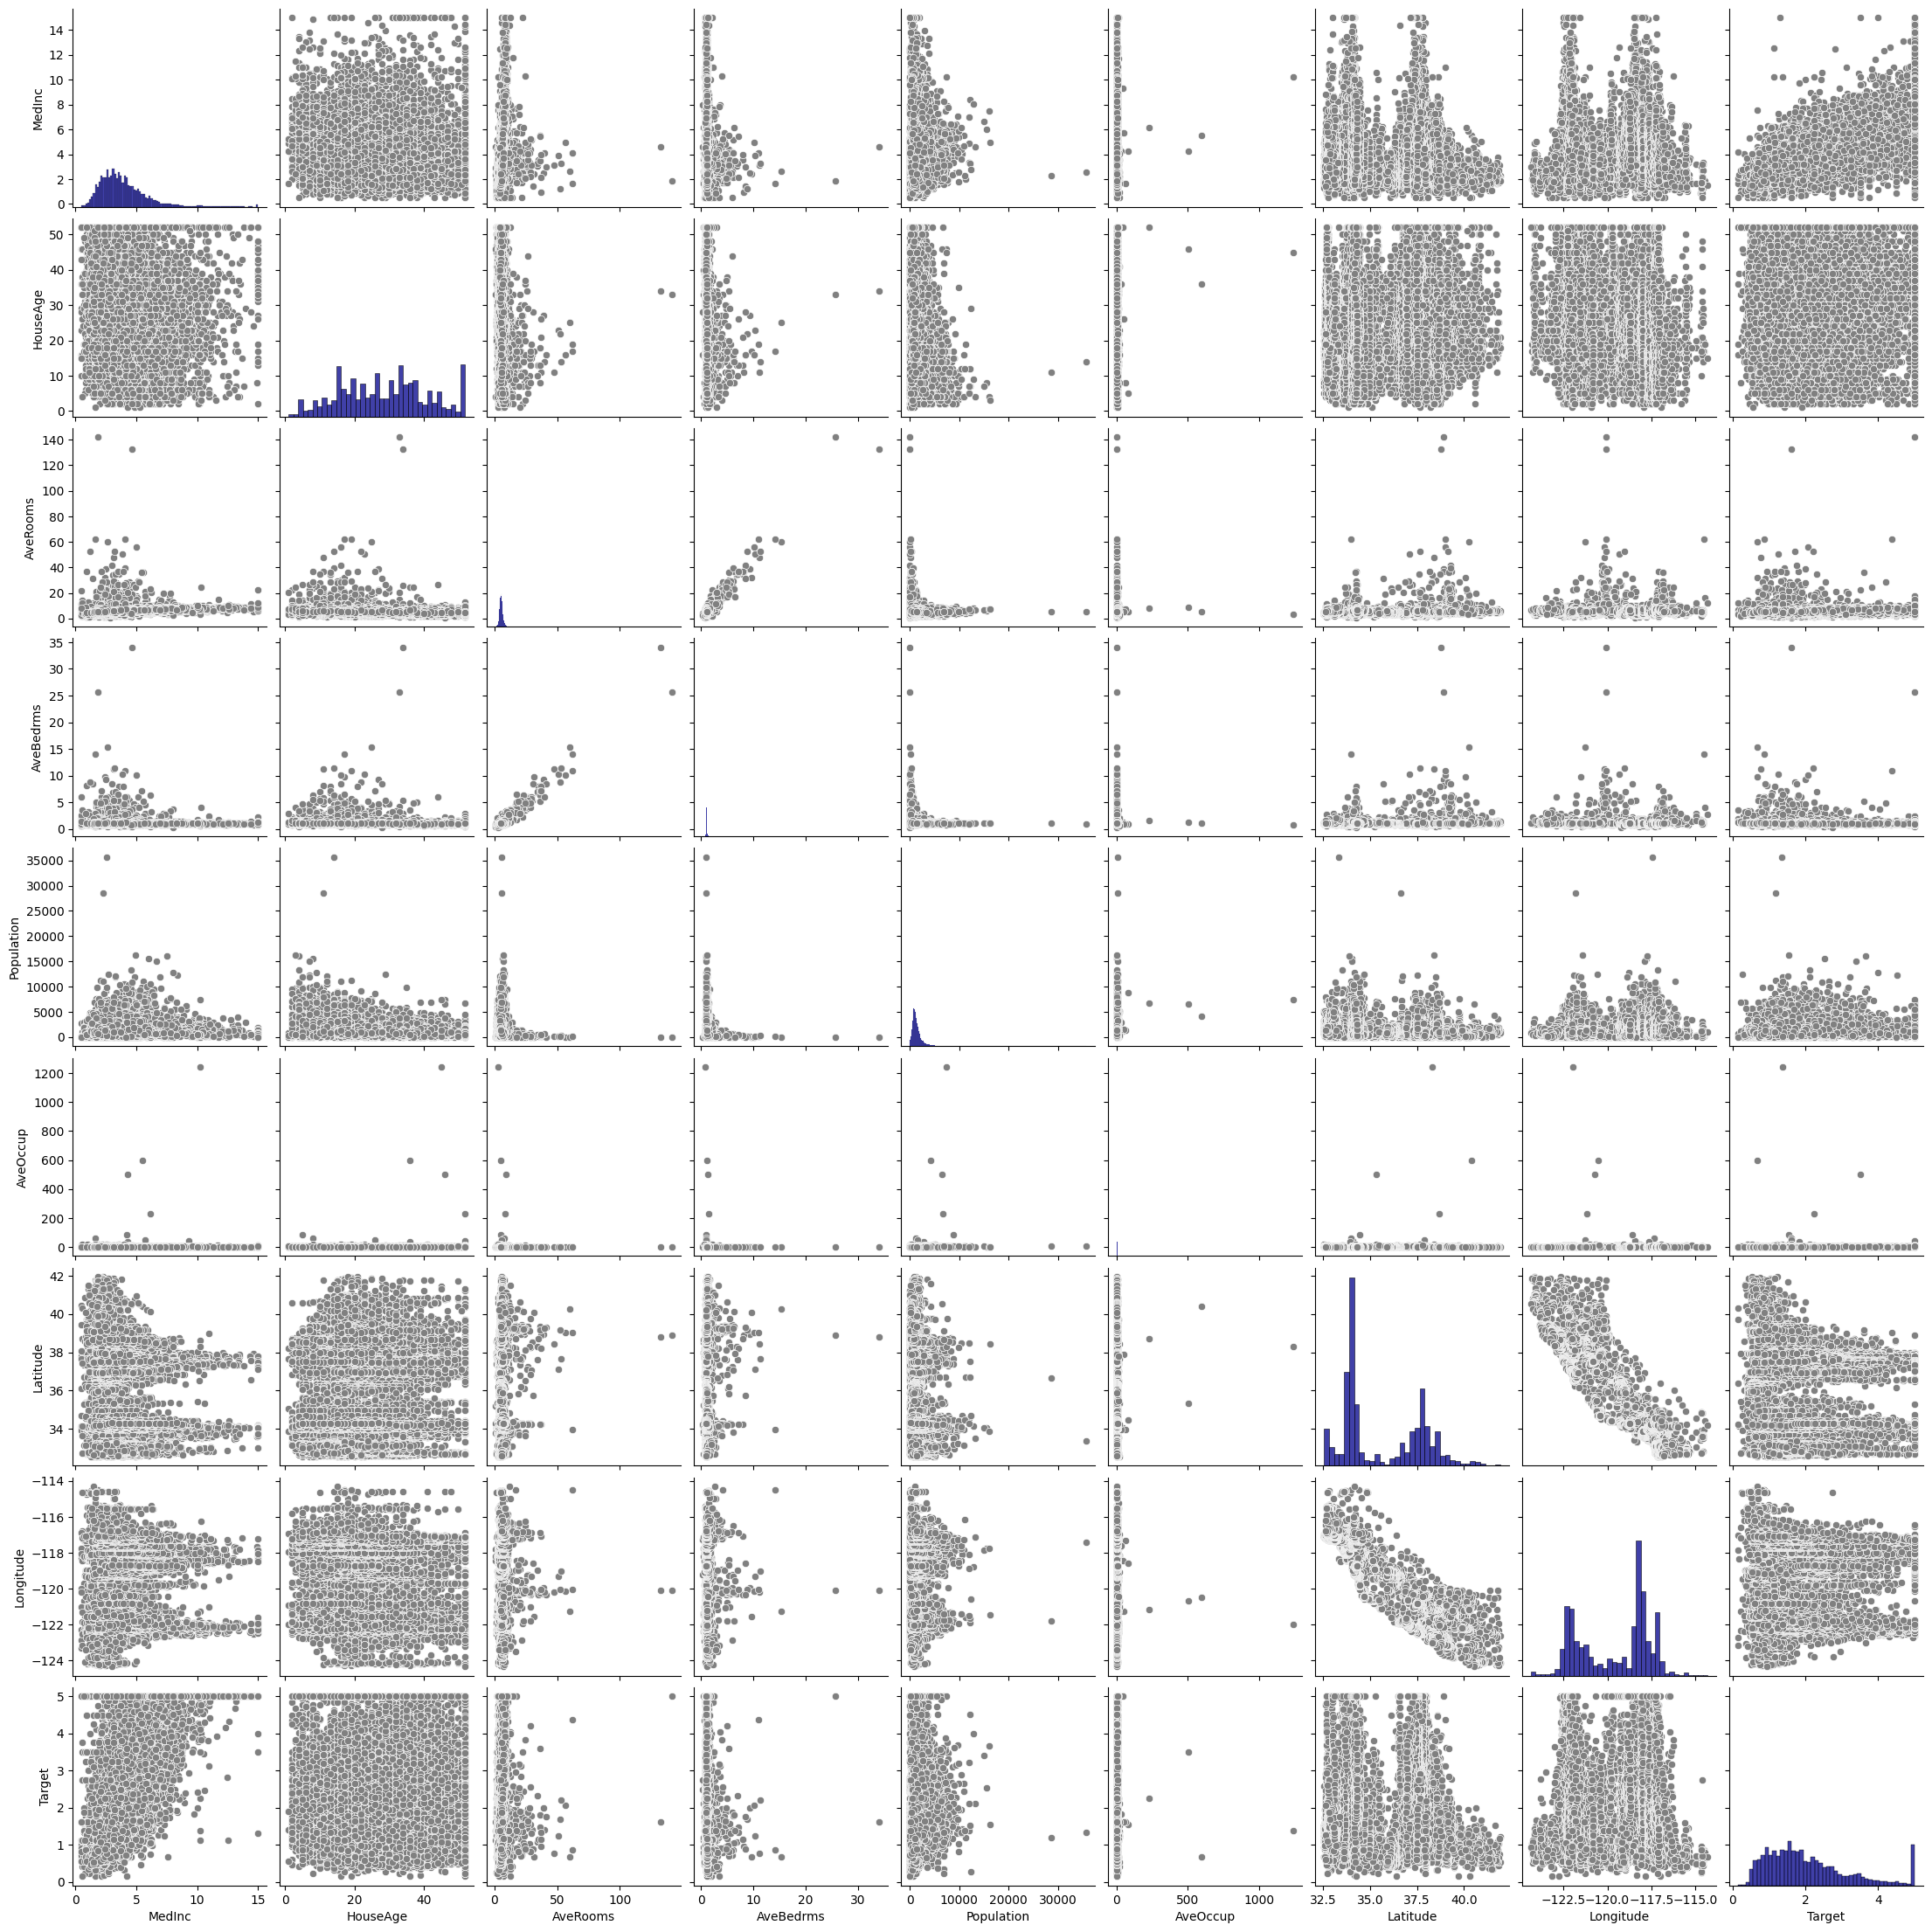

In [86]:
sns.pairplot(data=ca_house_df, 
             plot_kws={'color': 'gray'}, 
             diag_kws={'color': 'darkblue', 'fill': True})

From this we can eliminate the following columns for the 
- AveOccup

as this gives only a line, with some outliers

## Training and Testing Data
*.columns helps with getting the X and y values*

In [87]:
ca_house_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

**X: Numerical features of houses.** <br>
**y: Target value.**

In [88]:
X = ca_house_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude']]
y = ca_house_df["Target"]

**Splitting Data into training and testing sets**

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Instance of a LinearRegression() model named lm**

In [90]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [91]:
lm.fit(X=X_train, y=y_train)

LinearRegression()

**Print out the coefficients of the model**

In [92]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MedInc,0.439250
HouseAge,0.009320
AveRooms,-0.115318
AveBedrms,0.640303
Population,-0.000010
Latitude,-0.418812
Longitude,-0.432180


From this it can be seen, that <br>
- MedInc        median income in block group <br>
- AveBedrms     average number of bedrooms per household    

have the most influence on the target price. **Remember target is expressed in values of $100,000 instances** 

## Predicting Test Data

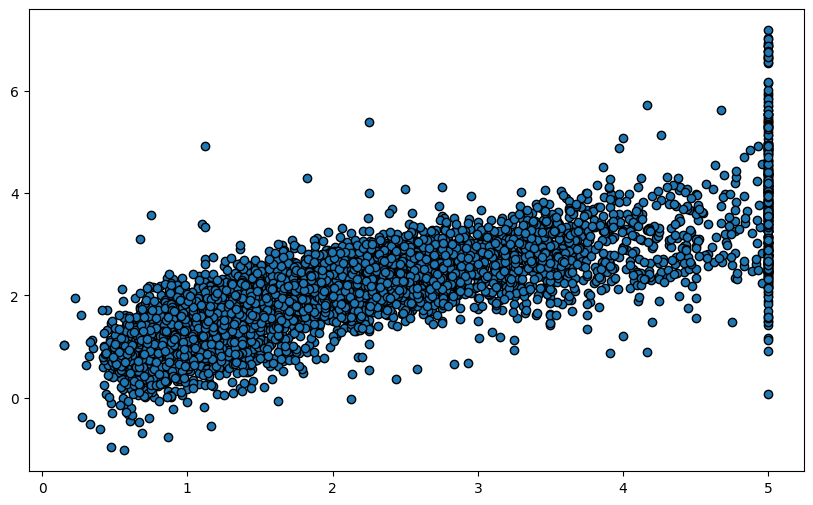

In [93]:
predictions = lm.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, edgecolors="black")

Import plotly.express to create an interactive plot, for further analyzing of the data

In [94]:
import plotly.express as px

In [95]:
px.scatter(x=y_test, y=predictions)

## Evaluating the Model

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions).round(2))
print('MSE:', metrics.mean_squared_error(y_test, predictions).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)).round(2))
print(f"R^2: {round(metrics.r2_score(y_test, predictions), 4)}")


MAE: 0.54
MSE: 0.53
RMSE: 0.73
R^2: 0.6056


## Plot Residuals

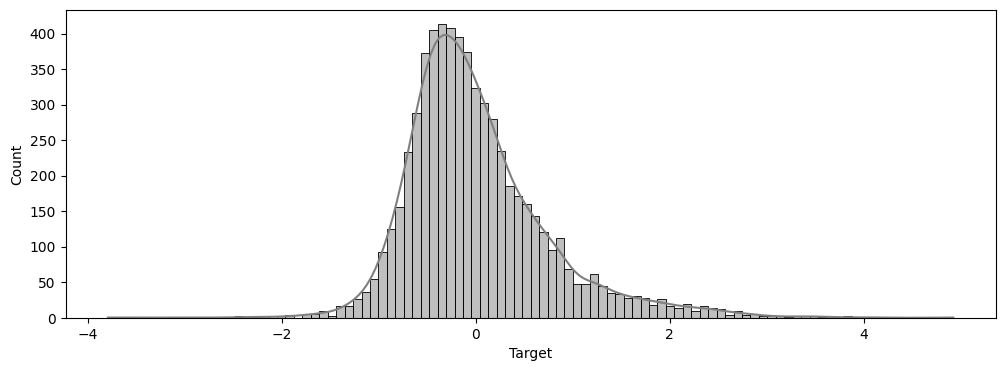

In [97]:
plt.figure(figsize=(12, 4))
sns.histplot((y_test-predictions), bins=100, kde=True, color="gray");

In [98]:
px.histogram((y_test-predictions))

## Conclusion

The Data seems somewhat compatiple with a linear regression. <br> <br>
Highest influence on the price:
- MedInc        median income in block group <br>
- AveBedrms     average number of bedrooms per household <br>

The Metrics:
- Root Mean Squared Error: 0.73
- $R^2$ score: 0.6056

**Result: An acceptable prediction of house prices.**